In [107]:
#importing essential packages
import numpy as np
import pandas as pd
df = pd.read_csv('advertising-1.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0,NaN,NaN,NaN,NaN
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/16 1:39,0,NaN,NaN,NaN,NaN
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0,NaN,NaN,NaN,NaN
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0,NaN,NaN,NaN,NaN
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0,NaN,NaN,NaN,NaN


In [108]:
df.shape

(1000, 14)

In [7]:
df.isnull().sum() #checking for null values and their quantities

Daily Time Spent on Site       0
Age                            0
Area Income                    0
Daily Internet Usage           0
Ad Topic Line                  0
City                           0
Male                           0
Country                        0
Timestamp                      0
Clicked on Ad                  0
Unnamed: 10                 1000
Unnamed: 11                 1000
Unnamed: 12                  998
Unnamed: 13                  997
dtype: int64

In [8]:
df.describe() #checking for the data spread i.e., variance

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,0.0,0.0,2.000000,3.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,NaN,NaN,0.500000,333.333333
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,NaN,NaN,0.707107,288.675135
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,NaN,NaN,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,NaN,NaN,0.250000,250.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,NaN,NaN,0.500000,500.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,NaN,NaN,0.750000,500.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,NaN,NaN,1.000000,500.000000


<AxesSubplot:xlabel='Daily Time Spent on Site'>

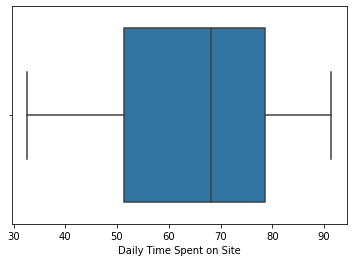

In [10]:
import seaborn as sns
sns.boxplot(df['Daily Time Spent on Site']) #boxplot to visualize one of the columns

In [117]:
df = df.iloc[:, :-4] #removing columns with lots of null values
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/16 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/16 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/16 2:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/16 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/16 2:35,0


In [21]:
count_df = df['Clicked on Ad'].value_counts().reset_index()
count_df.head() # to ensure the dataset is balanced

,index,Clicked on Ad
0,0,500
1,1,500


Luckly I chose a well balanced dataset

In [118]:
df = df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1) # remove categorical variable columns

In [119]:
#here begins the practice for multicollinearity - which is checking for relation between independent feature.
import statsmodels.api as sm
x = df.iloc[:, :-1]
y = df['Clicked on Ad']

# One reason to ensure that independent features do not have any correlation between them is to avoid overfitting the model.

In [120]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [33]:
x.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000


In [35]:
x = sm.add_constant(x) #addind a const to get the Beta-not value

In [36]:
x

,const,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,1.0,68.95,35,61833.90,256.09,0
1,1.0,80.23,31,68441.85,193.77,1
2,1.0,69.47,26,59785.94,236.50,0
3,1.0,74.15,29,54806.18,245.89,1
4,1.0,68.37,35,73889.99,225.58,0
...,...,...,...,...,...,...
995,1.0,72.97,30,71384.57,208.58,1
996,1.0,51.30,45,67782.17,134.42,1
997,1.0,51.63,51,42415.72,120.37,1
998,1.0,55.55,19,41920.79,187.95,0


In [38]:
model= sm.OLS(y, x).fit() #using the oridnary least square regression method
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Clicked on Ad   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     931.2
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:43:16   Log-Likelihood:                 143.05
No. Observations:                1000   AIC:                            -274.1
Df Residuals:                     994   BIC:                            -244.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.3086      0.058     40.113      0.000       2.196       2.422
Daily Time Spent on Site    -0.0128      0.001    -25.294      0.000      -0.014      -0.012
Age                          0.0090      0.001     10.845      0.000       0.007       0.011
Area Income              -6.173e-06   5.35e-07    -11.536      0.000   -7.22e-06   -5.12e-06
Daily Internet Usage        -0.0053      0.000    -28.169      0.000      -0.006      -0.005
Male                        -0.0293      0.013     -2.195      0.028      -0.055      -0.003
==============================================================================
Omnibus:                      304.139   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.285
Skew:                           1.478   Prob(JB):                    1.51e-215
Kurtosis:                       6.873   Cond. No.                     4.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### From the summary, it is shown that the independent features do not have any correlation within them based on the standard error value, if there were any correlation the std err values would be highly inflated, hence it is safe to work with this dataset
if there were any correlation, then it would be safe to delete on the of columns probably the one with greater p-value
* reference https://github.com/krishnaik06/Multicollinearity/blob/master/MultiCollinearity.ipynb 

In [74]:
df.corr() #this proves the above ordinary least square model summary that there are no correlation between independent features

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [123]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [124]:
scaler.fit(x)

StandardScaler()

In [125]:
scaled_feature = scaler.transform(x)

In [126]:
df_scaled = pd.DataFrame(scaled_feature, columns=x.columns[:])
df_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


In [127]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled,y, test_size=0.2)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

#running knn in a loop to check for most appropriate k value
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

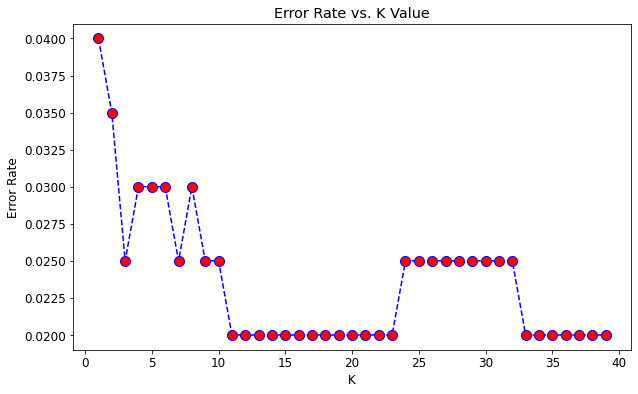

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph we can see that best k value would be between 10 till 24 and the error rate tends to hower around 0.04 to 0.035, So let's retrain the model with k value being 3 and check the classification report

In [130]:
#kNN model
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred_3 = knn.predict(X_test)

In [53]:
accuracy = knn.score(X_test, y_test)
accuracy

0.97

In [54]:
from sklearn import metrics 

cm = metrics.confusion_matrix(y_test, pred_3)  
cm

array([[96,  2],
       [ 4, 98]])

In [56]:
print(metrics.classification_report(y_test,pred_3))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        98
           1       0.98      0.96      0.97       102

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



# Now that we have built the model using standardization technique, let's try with normalization technique and see if the accuracy increases.

In [132]:
#Normalizing
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
scaled = scaler_1.fit_transform(x)

In [133]:
scaler_1

MinMaxScaler()

In [134]:
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [135]:
x_scaled = pd.DataFrame(scaled, columns=x.columns[:])
x_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.617882,0.380952,0.730472,0.916031,0.0
1,0.809621,0.285714,0.831375,0.538746,1.0
2,0.626721,0.166667,0.699200,0.797433,0.0
3,0.706272,0.238095,0.623160,0.854280,1.0
4,0.608023,0.380952,0.914568,0.731323,0.0


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled,y, test_size=0.2)

In [137]:
#https://github.com/krishnaik06/K-NEarest-Neighbor/blob/master/01-K%20Nearest%20Neighbors%20with%20Python.ipynb
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

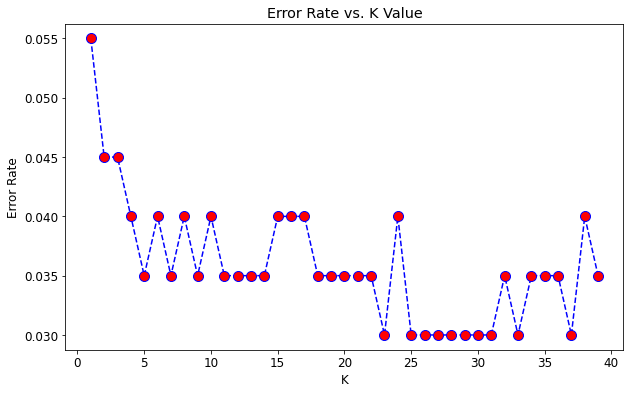

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Now as we can see there is a difference in error rate and we have two best fit case for k value, let's try implementing both the values.

In [139]:
#with k=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred_3 = knn.predict(X_test)

In [105]:
y_test

872    0
125    0
279    0
34     1
674    0
      ..
44     0
99     0
384    1
538    0
936    1
Name: Clicked on Ad, Length: 200, dtype: int64

In [141]:
accuracy = knn.score(X_test, y_test)
accuracy

0.97

Normalizing has the same accuracy

In [70]:

cm = metrics.confusion_matrix(y_test, pred_3)  
cm

array([[117,   0],
       [  5,  78]])

In [71]:
print(metrics.classification_report(y_test,pred_3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       117
           1       1.00      0.94      0.97        83

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [78]:
#with k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred_3 = knn.predict(X_test)

In [143]:
accuracy = knn.score(X_test, y_test)
accuracy

0.97

The accuracy remains the same for both the k values yet there is a slight increase in percentage when normalized

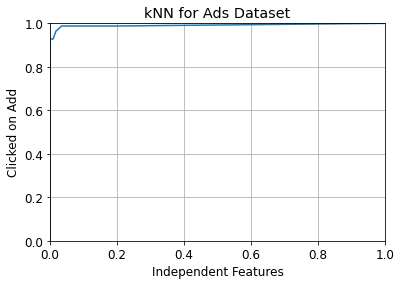

In [76]:
from sklearn import metrics
probs_y=knn.predict_proba(X_test) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_y[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('kNN for Ads Dataset')
plt.xlabel('Independent Features')
plt.ylabel('Clicked on Add')
plt.grid(True)

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
* reference https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/